# Lab 1: Unbiasedness and Consistency of the Sample Mean
### Jake Lee
---

## Background Information: United States Postal Service Employee Productivity
The United States Postal Service is an independent establishment of the executive branch of the federal government, providing constitutionally-guaranteed mail service to more than 150 million addresses in the United States. It employs more than 400,000 workers across more than 30,000 retail offices, warehouses, and mail sorting facilities. The Postal Service processed and delivered more than 400 million pieces of mail per day in 2020. The Postal Service strives to manage its operations in a data-driven way, but given the size and scope
of its operations, it is impractical to monitor productivity for its entire workforce at all
times. Instead, the Postal Service employees a random-sample procedure in order to gather
information about employee productivity in a cost-effective way.

In this lab, we evaluate the properties of the sample mean of a random-sample of
data as an unbiased and consistent estimator of the population mean of a random variable,
employee productivity. Employee productivity is measured by the number of pieces of mail
processed per hour. The dataset USPSproductivity.dta, which can be found on Canvas,
contains simulated data with the following variables:
- `id`: employee id
- `prod`: employee productivity, measured as number of mail pieces processed per hour.
- `position`: employee position, either letter carrier or retail service.

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
data = 'USPSproductivity.dta'
df = pd.read_stata(data)
df.head()

,id,prod,position,random1_10,random2_10,random3_10,random4_10,random5_10,random6_10,random7_10,...,random41_10000,random42_10000,random43_10000,random44_10000,random45_10000,random46_10000,random47_10000,random48_10000,random49_10000,random50_10000
0,1391259.0,323.151550,Retail Sales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1116093.0,473.728699,Letter Carrier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1343329.0,289.387115,Retail Sales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1490441.0,319.700470,Retail Sales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1192130.0,374.338928,Letter Carrier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Preclass Work
---

## 5. 

In [3]:
# num observations, num columns
df.shape

(495941, 303)

In [4]:
# data type 'prod'
df['prod'].dtype

dtype('float32')

In [5]:
# data type 'position'
df['position'].dtype

CategoricalDtype(categories=['Retail Sales', 'Letter Carrier'], ordered=True)

## 6.

In [6]:
# mean 'prod'
df['prod'].describe()

count    495941.000000
mean        372.974884
std          46.957481
min         144.484070
25%         341.296112
50%         373.053619
75%         404.667969
max         608.722046
Name: prod, dtype: float64

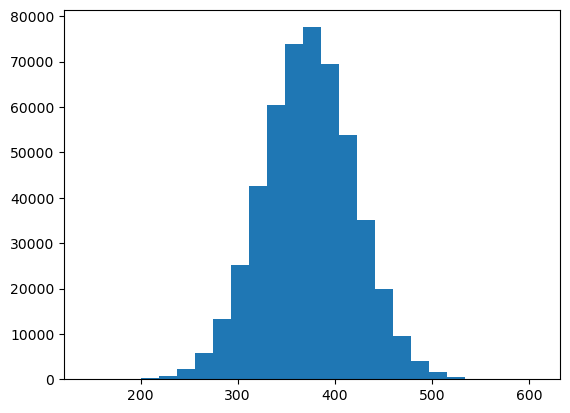

In [7]:
# histogram
plt.hist(df['prod'], bins=25)
plt.savefig('productivityHistogram.png')
plt.show()

We notice the `prod` column follows a normal distribution

# In-class Lab Part 1
---

## 1. 
Student Group Number: 5

## 3.
Keep Random5_10, random5_50 . . . random5_5000

In [8]:
random5_cols = ['id', 
                'prod', 
                'position',
                'random5_10',
                'random5_50',
                'random5_100',
                'random5_1000',
                'random5_5000']

rand5 = df[random5_cols]
rand5.head()

,id,prod,position,random5_10,random5_50,random5_100,random5_1000,random5_5000
0,1391259.0,323.151550,Retail Sales,0.0,0.0,0.0,0.0,0.0
1,1116093.0,473.728699,Letter Carrier,0.0,0.0,0.0,0.0,0.0
2,1343329.0,289.387115,Retail Sales,0.0,0.0,0.0,0.0,0.0
3,1490441.0,319.700470,Retail Sales,0.0,0.0,0.0,0.0,0.0
4,1192130.0,374.338928,Letter Carrier,0.0,0.0,0.0,0.0,0.0


## 4. The USPS cannot easily observe the productivity of all employees within the organization. Instead, the USPS randomly captures the productivity of 10 employees

Standard error: $se = \frac{stddev}{\sqrt N} $

In [9]:
# locate employees and their production level
rand5_10 = rand5.loc[rand5['random5_10'] == 1, 'prod']

In [10]:
# standard error by hand
(np.std(rand5_10) / np.sqrt(10)).round()

12.0

In [11]:
rand5_10_sem = rand5_10.sem()
rand5_10_sem.round()

12.0

In [12]:
rand5_10_mean = rand5_10.mean()
rand5_10_mean

392.7715

## 5. USPS increases the size of its random sample to 50 employees.

In [13]:
# locate 50 sample
rand5_50 = rand5.loc[rand5['random5_50'] == 1, 'prod']

In [14]:
# mean 50 sample
rand5_50_mean = rand5_50.mean()
rand5_50_mean

370.75778

In [15]:
# standard error
rand5_50_sem = rand5_50.sem()
rand5_50_sem 

7.861652256584589

The random error for the greater sample size is closer to the mean as expected.

## 6. USPS increases the size of its random sample to 100 employees.

In [16]:
# locate 100 sample
rand5_100 = rand5.loc[rand5['random5_100'] == 1, 'prod']

In [17]:
# mean, sem 100 sample
rand5_100_mean = rand5_100.mean()
rand5_100_sem = rand5_100.sem()
rand5_100_mean

377.6203

In [18]:
# confidence interval 100 sample
confidence_level = 0.95
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, (100 - 1) * rand5_100_sem)
confidence_interval = (rand5_100_mean - margin_of_error, rand5_100_mean + margin_of_error)
print("Confidence Interval (95%):", confidence_interval)

Confidence Interval (95%): (375.6553860046028, 379.5852145813347)


Interpretation: We can be 95% confident that the true average productivity level (`prod`) of the workers is between 375.66 and 379.59 units based on our sample data with sample size 100.

## 7. USPS increases the size of its random sample to 1000 employees.

In [19]:
# locate 1000 sample
rand5_1000 = rand5.loc[rand5['random5_1000'] == 1, 'prod']

In [20]:
# mean, sem 1000 sample
rand5_1000_mean = rand5_1000.mean()
rand5_1000_sem = rand5_1000.sem()
rand5_1000_mean

372.27698

In [21]:
# confidence interval 1000 sample
confidence_level = 0.95
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, (100 - 1) * rand5_1000_sem)
confidence_interval = (rand5_100_mean - margin_of_error, rand5_1000_mean + margin_of_error)
print("Confidence Interval (95%):", confidence_interval)

Confidence Interval (95%): (375.64371308690426, 374.253564745127)


As expected, the confidence interval for the larger sample size of 1000 is more narrow than the sample size of 100 meaning the estimate becomes more precise and closer to the true mean.

---

In summary, this lab focuses on Consistency and Unbiasedness: 
- `Consistency` focuses on how well an estimate converges to the true value as the sample size increases.
- `Unbiasedness` is a property that holds irrespective of sample size (Finite Sample Property), ensuring that, on average, the estimate is accurate.